In [1]:
import pandas as pd
df=pd.read_csv('CropPrice.csv')
df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code
0,Uttar Pradesh,Gautam Budh Nagar,Dadri,Garlic,Garlic,FAQ,09/07/2024,10500,11000,10800,25
1,Uttar Pradesh,Gautam Budh Nagar,Dadri,Garlic,Garlic,FAQ,17/07/2024,11100,11800,11500,25
2,Uttar Pradesh,Gautam Budh Nagar,Dadri,Garlic,Garlic,FAQ,19/07/2024,11200,11750,11500,25
3,Uttar Pradesh,Gautam Budh Nagar,Dadri,Garlic,Garlic,FAQ,22/07/2024,11300,11900,11600,25
4,Uttar Pradesh,Gautam Budh Nagar,Dadri,Wheat,Dara,FAQ,25/07/2024,2400,2550,2475,1


In [2]:
df.shape

(26488, 11)

In [3]:
df.isnull().sum()

State             0
District          0
Market            0
Commodity         0
Variety           0
Grade             0
Arrival_Date      0
Min_Price         0
Max_Price         0
Modal_Price       0
Commodity_Code    0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df['Modal_Price'].value_counts()

Modal_Price
1900     444
1200     432
1300     383
1800     373
1700     343
        ... 
4680       1
6675       1
6210       1
3190       1
13875      1
Name: count, Length: 1350, dtype: int64

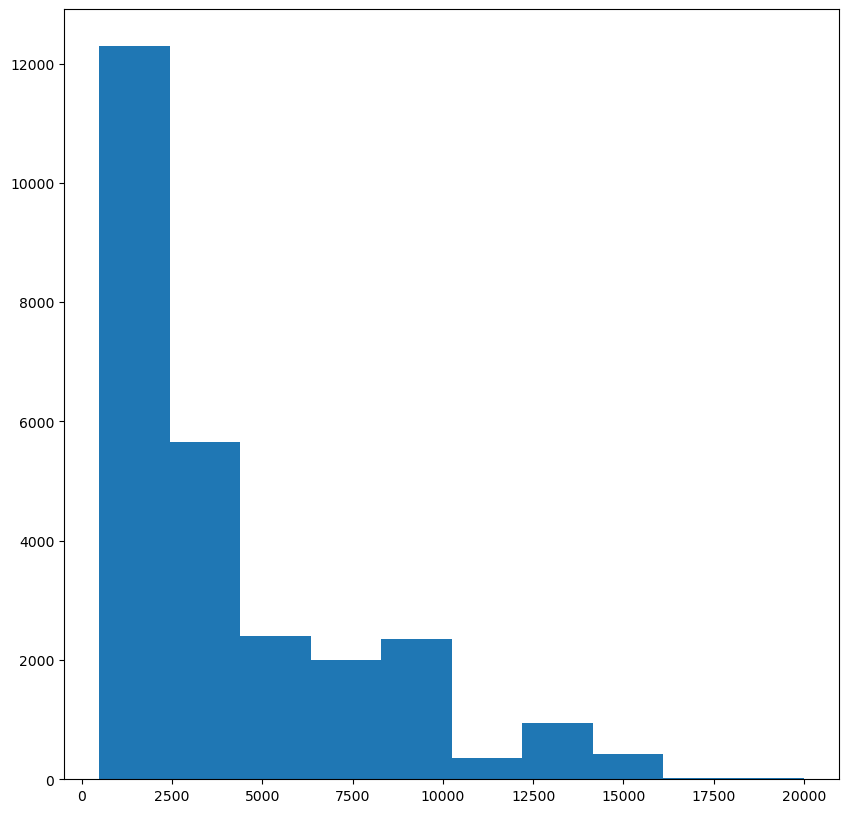

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.hist(df['Modal_Price'])
plt.show()


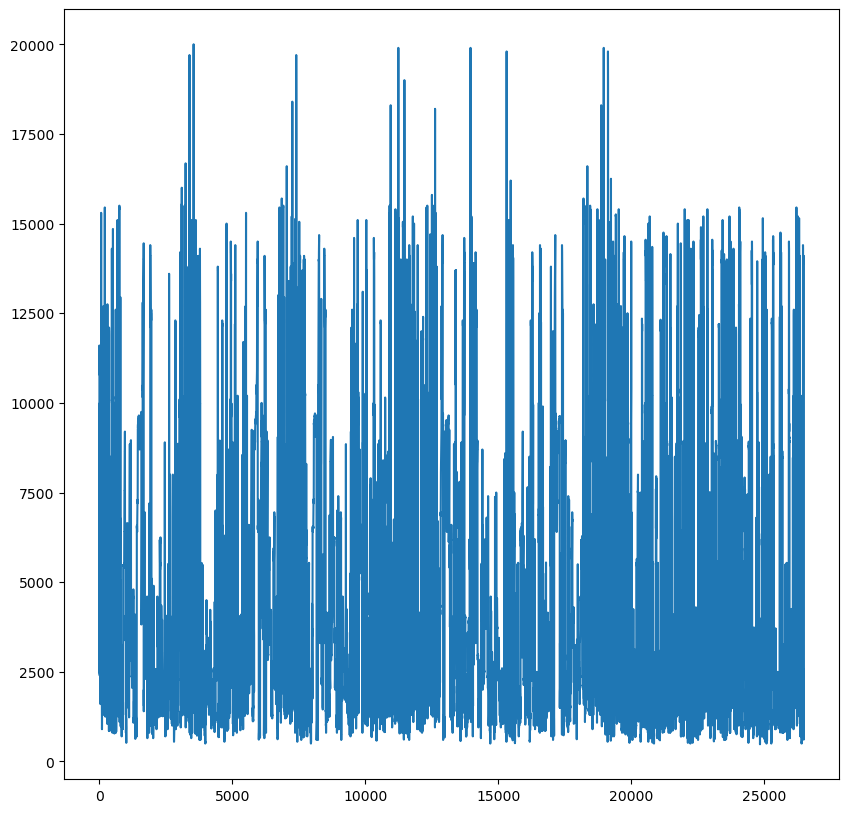

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(df['Modal_Price'])
plt.show()


In [8]:
df.head(2)

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code
0,Uttar Pradesh,Gautam Budh Nagar,Dadri,Garlic,Garlic,FAQ,09/07/2024,10500,11000,10800,25
1,Uttar Pradesh,Gautam Budh Nagar,Dadri,Garlic,Garlic,FAQ,17/07/2024,11100,11800,11500,25


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_data(df):
    sns.set_style("whitegrid")

    numeric_cols = ['Min_Price', 'Max_Price', 'Modal_Price']
    categorical_cols = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']

    df[numeric_cols].hist(figsize=(12, 5), bins=30, edgecolor='black')
    plt.suptitle('Distribution of Numerical Features')
    plt.show()

    # Boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df[numeric_cols])
    plt.title('Boxplot of Numerical Features')
    plt.show()

    # Count
    for col in categorical_cols:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, y=col, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.show()
#BI
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['Min_Price'],y=df['Max_Price'], hue=df['Commodity'], alpha=0.7)
    plt.title('Min_Price vs Max_Price')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Commodity', y='Modal_Price')
    plt.xticks(rotation=45)
    plt.title('Commodity vs Modal_Price')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

    sns.pairplot(df[numeric_cols])
    plt.suptitle('Pair Plot of Numerical Features')
    plt.show()





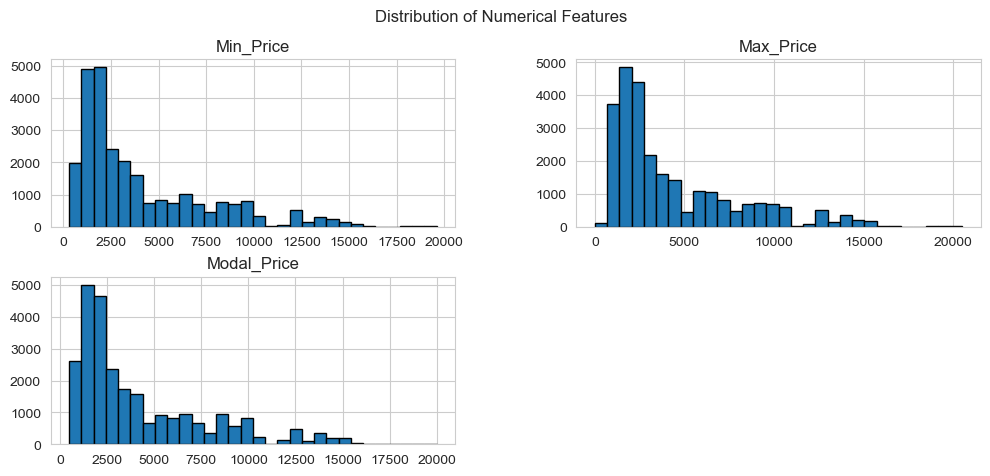

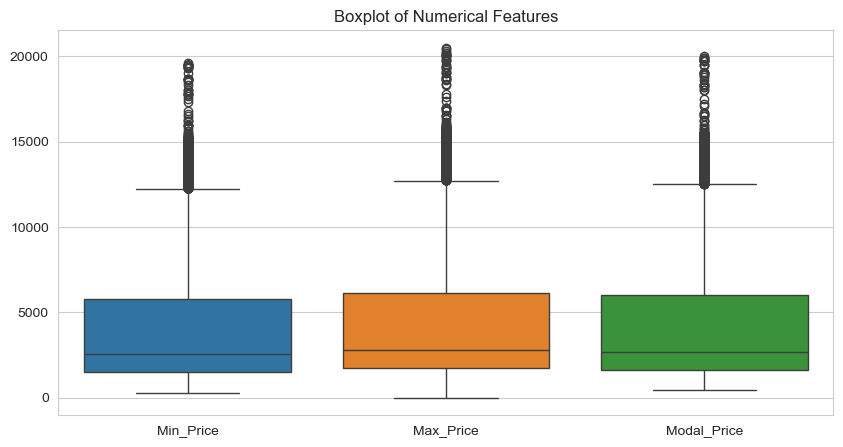

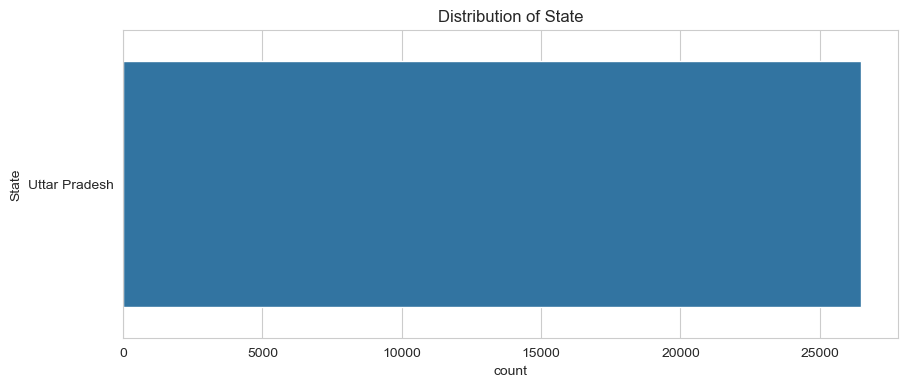

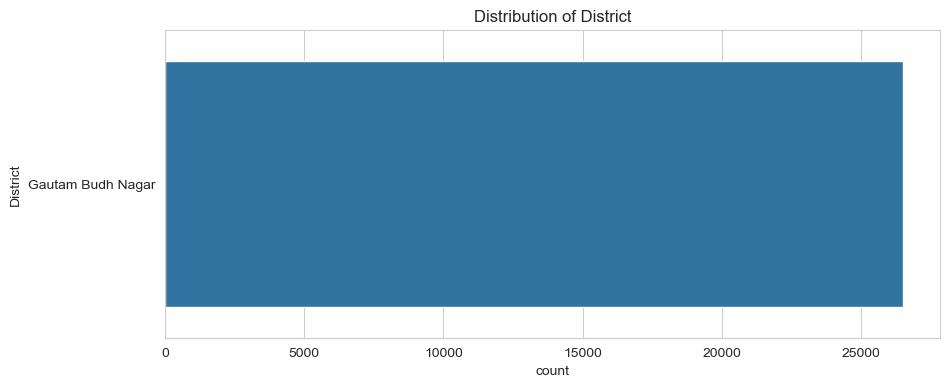

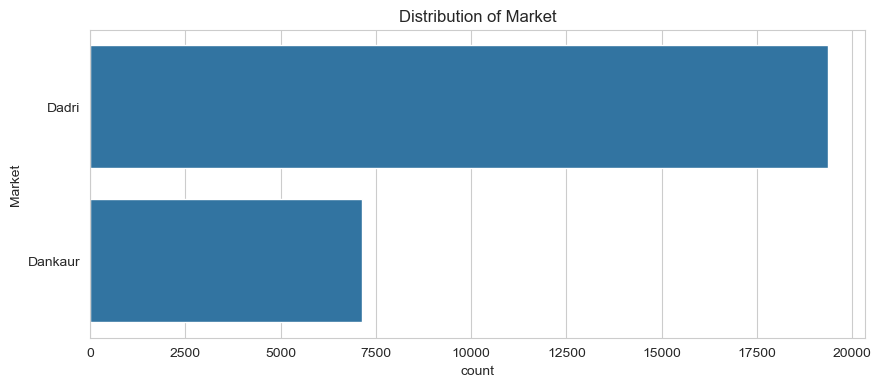

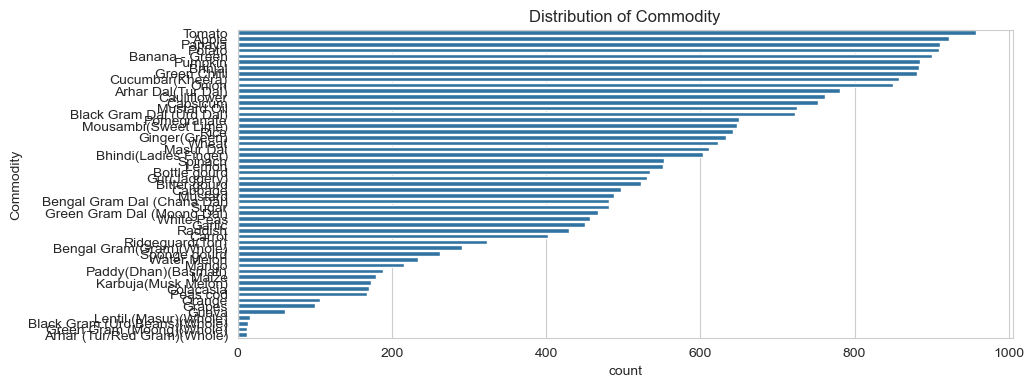

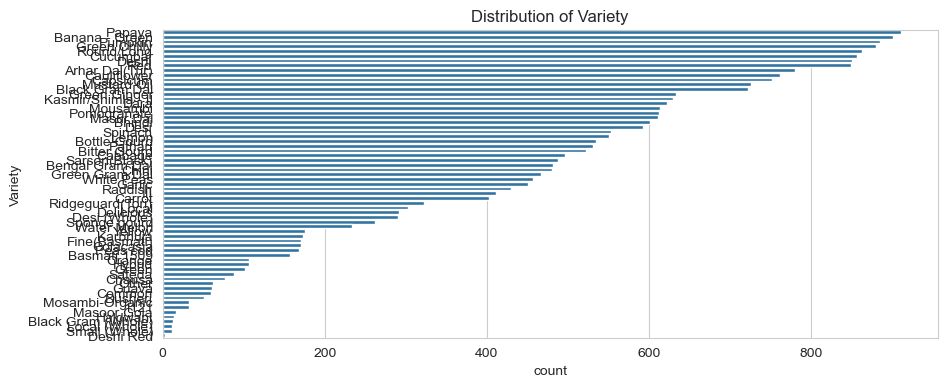

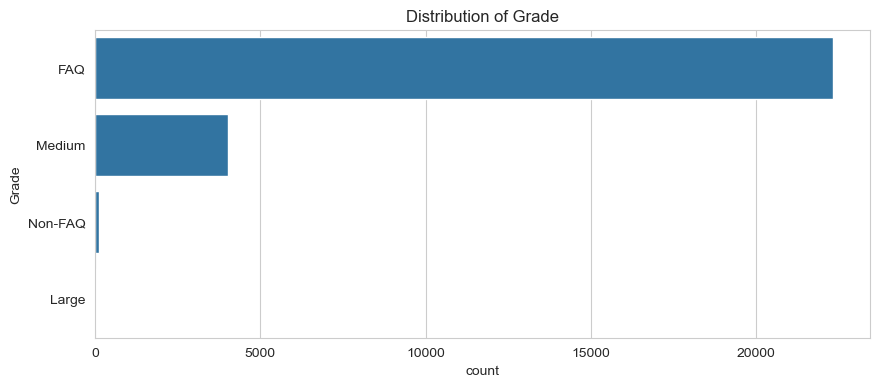

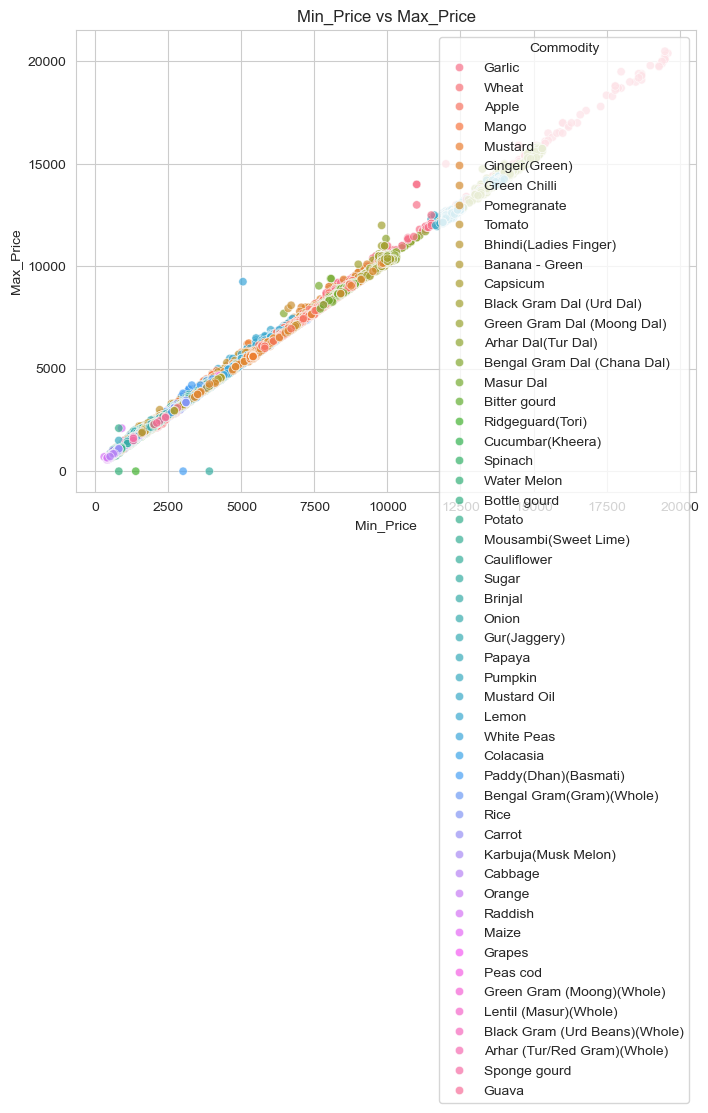

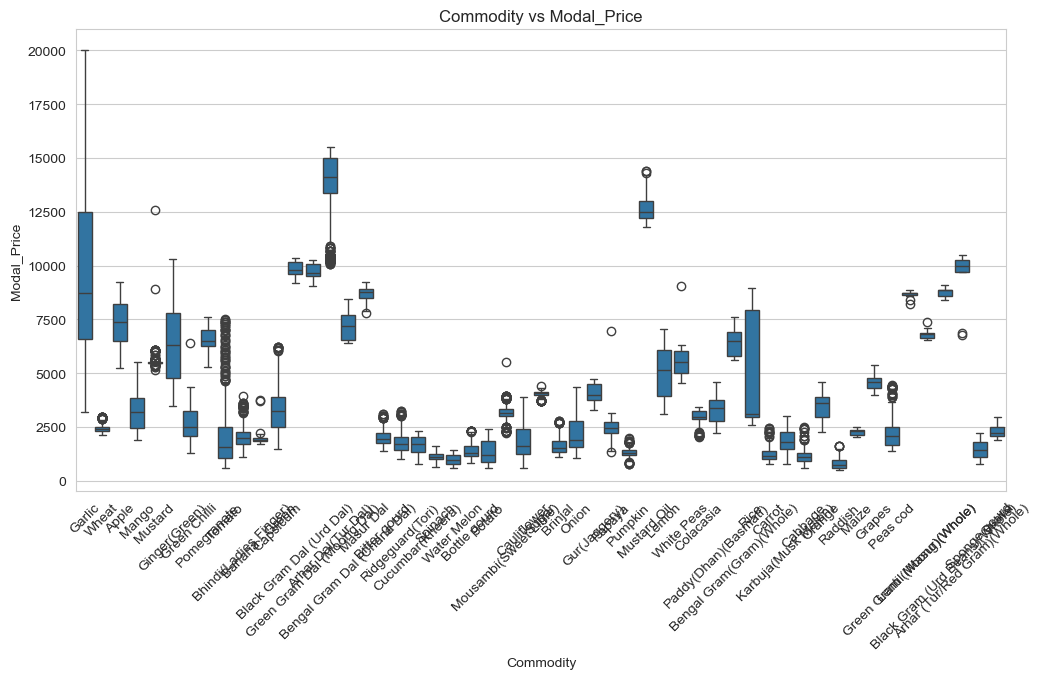

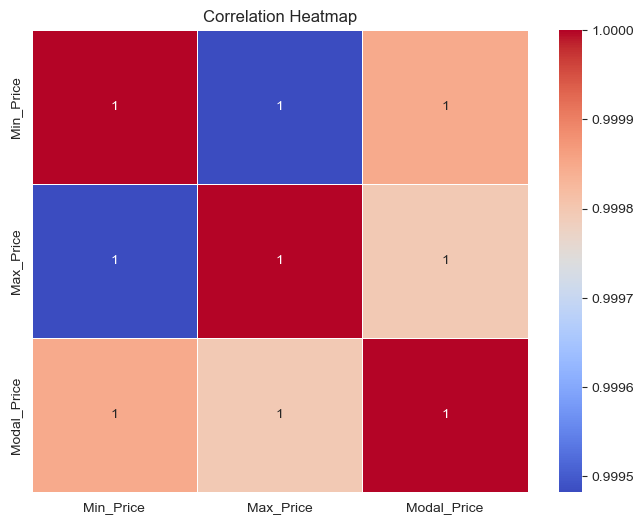

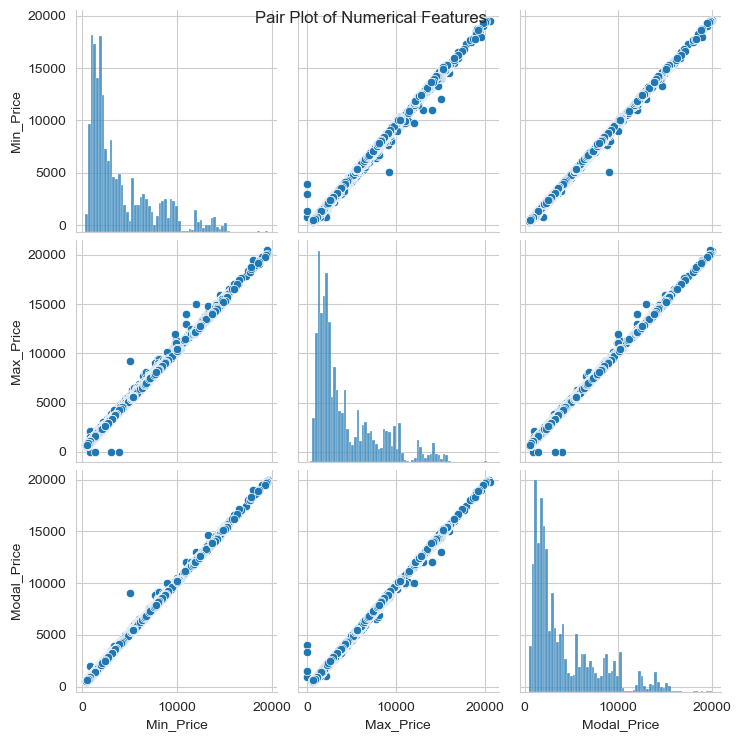

In [10]:
visualize_data(df)

In [11]:
df.sample(10)

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code
2691,Uttar Pradesh,Gautam Budh Nagar,Dadri,Tomato,Deshi,FAQ,22/03/2024,1550,2000,1750,78
10646,Uttar Pradesh,Gautam Budh Nagar,Dadri,Brinjal,Round/Long,FAQ,27/01/2024,1630,1830,1730,35
8708,Uttar Pradesh,Gautam Budh Nagar,Dadri,Rice,III,FAQ,10/03/2023,2900,3100,3000,3
9318,Uttar Pradesh,Gautam Budh Nagar,Dadri,Green Chilli,Green Chilly,FAQ,06/12/2023,1400,1600,1500,87
3501,Uttar Pradesh,Gautam Budh Nagar,Dadri,Wheat,Dara,FAQ,02/12/2024,2700,2900,2800,1
22756,Uttar Pradesh,Gautam Budh Nagar,Dankaur,Apple,Delicious,Medium,21/04/2023,6700,7050,6900,17
18577,Uttar Pradesh,Gautam Budh Nagar,Dadri,Mustard Oil,Mustard Oil,FAQ,01/07/2024,12400,12850,12600,324
1798,Uttar Pradesh,Gautam Budh Nagar,Dadri,Gur(Jaggery),Pathari,FAQ,23/07/2023,4400,4600,4500,74
1649,Uttar Pradesh,Gautam Budh Nagar,Dadri,Arhar Dal(Tur Dal),Arhar Dal(Tur),FAQ,15/07/2023,12400,12800,12600,260
14009,Uttar Pradesh,Gautam Budh Nagar,Dadri,Banana - Green,Banana - Green,FAQ,19/12/2024,1750,1980,1860,90


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Reload the original DataFrame to ensure it has not been modified
df = pd.read_csv('CropPrice.csv')

categorical_cols = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string if necessary
    label_encoders[col] = le  # Store encoder for future use (optional)

# Define features (X) and target variable (y)
X = df.drop(columns=['Modal_Price'])  # Features
y = df['Modal_Price']  # Target variable

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print dataset shapes
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (21190, 10) (21190,)
Test set: (5298, 10) (5298,)


In [13]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())


State             0
District          0
Market            0
Commodity         0
Variety           0
Grade             0
Arrival_Date      0
Min_Price         0
Max_Price         0
Commodity_Code    0
dtype: int64
0


In [14]:
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d/%m/%Y')
df['Days_Since_Start'] = (df['Arrival_Date'] - df['Arrival_Date'].min()).dt.days
df.drop(columns=['Arrival_Date'], inplace=True)

In [15]:
print(X_train.dtypes)


State              int32
District           int32
Market             int32
Commodity          int32
Variety            int32
Grade              int32
Arrival_Date      object
Min_Price          int64
Max_Price          int64
Commodity_Code     int64
dtype: object


In [16]:
print(X_train.shape, y_train.shape)


(21190, 10) (21190,)


In [17]:
df.sample(4)

,State,District,Market,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price,Commodity_Code,Days_Since_Start
11442,0,0,0,12,10,0,770,950,850,154,700
12381,0,0,0,9,8,0,10000,10600,10280,264,578
3713,0,0,0,44,35,0,3100,3350,3250,3,723
9412,0,0,0,15,13,0,650,830,740,34,291


In [18]:
X_train = X_train.drop(columns=['Arrival_Date'], errors='ignore')
X_test = X_test.drop(columns=['Arrival_Date'], errors='ignore')


In [19]:
print(X_train.dtypes)


State             int32
District          int32
Market            int32
Commodity         int32
Variety           int32
Grade             int32
Min_Price         int64
Max_Price         int64
Commodity_Code    int64
dtype: object


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor(n_estimators=90, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')


Mean Absolute Error (MAE): 12.825502509448945
Mean Squared Error (MSE): 730.8711178084422
R2 Score: 0.9999436880377573


In [21]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R2 Scores: {cv_scores}')
print(f'Average R2 Score: {cv_scores.mean()}')


Cross-Validation R2 Scores: [0.99992636 0.99991228 0.99991903 0.99991173 0.99993223]
Average R2 Score: 0.9999203265194005


In [22]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ada = AdaBoostRegressor(n_estimators=100, random_state=42)

ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)
mae_ada = mean_absolute_error(y_test, y_pred_ada)

print(f'AdaBoost - Mean Absolute Error (MAE): {mae_ada}')
print(f'AdaBoost - Mean Squared Error (MSE): {mse_ada}')
print(f'AdaBoost - R2 Score: {r2_ada}')


AdaBoost - Mean Absolute Error (MAE): 206.4510609537199
AdaBoost - Mean Squared Error (MSE): 70587.17741780357
AdaBoost - R2 Score: 0.9945614180493502


In [23]:
print("Random Forest Performance:")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2 Score: {r2}\n')

print("AdaBoost Performance:")
print(f'MAE: {mae_ada}')
print(f'MSE: {mse_ada}')
print(f'R2 Score: {r2_ada}')


Random Forest Performance:
MAE: 12.825502509448945
MSE: 730.8711178084422
R2 Score: 0.9999436880377573

AdaBoost Performance:
MAE: 206.4510609537199
MSE: 70587.17741780357
R2 Score: 0.9945614180493502


In [24]:
from sklearn.linear_model import Ridge
rg=Ridge(alpha=0.00001)
rg.fit(X_train,y_train)
y_pred_rg=rg.predict(X_test)
r2_rg = r2_score(y_test,y_pred_rg)
r2_rg



c:\Users\vinay\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.91868e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.999940432901231

In [25]:
df.sample(2)

,State,District,Market,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price,Commodity_Code,Days_Since_Start
26083,0,0,1,7,6,0,1600,1845,1700,81,508
8182,0,0,0,41,23,0,1000,1210,1080,24,88


In [26]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.00001)
lasso.fit(X_train,y_train)
y_pred_rg=lasso.predict(X_test)
r2_rg = r2_score(y_test,y_pred_rg)
r2_rg



0.9999149283899774

In [27]:
import pickle
with open('ada.pkl','wb') as file:
  pickle.dump(ada,file)

In [28]:
with open('ada.pkl','rb') as file:
  load_model=pickle.load(file)

In [29]:
type(df['District'])

pandas.core.series.Series